<a href="https://colab.research.google.com/github/charlesincharge/Caltech-CS155-2022/blob/main/sets/set4/set4_prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2 Sample Code

This sample code is meant as a guide on how to use PyTorch and how to use the relevant model layers. This not a guide on how to design a network and the network in this example is intentionally designed to have poor performace.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [3]:
!pip list | grep torch

torch                         1.8.0
torchvision                   0.10.0


## Loading MNIST
The `torchvision` module contains links to many standard datasets. We can load the MNIST dataset into a `Dataset` object as follows:

In [2]:
train_dataset = datasets.MNIST('./data', train=True, download=True,  # Downloads into a directory ../data
                               transform=transforms.ToTensor())
test_dataset = datasets.MNIST('./data', train=False, download=False,  # No need to download again
                              transform=transforms.ToTensor())

/opt/homebrew/Caskroom/miniforge/base/envs/main_env/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /tmp/pip-req-build-4gogm3_o/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


The `Dataset` object is an iterable where each element is a tuple of (input `Tensor`, target):

In [5]:
print(len(train_dataset), type(train_dataset[0][0]), type(train_dataset[0][1]))

60000 <class 'torch.Tensor'> <class 'int'>


In [9]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [10]:
len(train_dataset)

60000

In [11]:
len(test_dataset)

10000

We can convert images to numpy arrays and plot them with matplotlib:

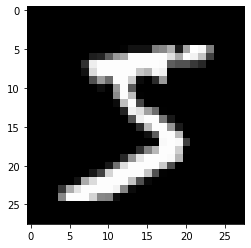

In [6]:
plt.imshow(train_dataset[0][0][0].numpy(), cmap='gray')

## Network Definition
Let's instantiate a model and take a look at the layers.

In [3]:
model1 = nn.Sequential(
    # In problem 2, we don't use the 2D structure of an image at all. Our network
    # takes in a flat vector of the pixel values as input.
    nn.Flatten(),  
    nn.Linear(784, 60),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(60, 40),
    nn.ReLU(),
    nn.Dropout(0.1),
    nn.Linear(40, 10),
)

model2 = nn.Sequential(
    # In problem 2, we don't use the 2D structure of an image at all. Our network
    # takes in a flat vector of the pixel values as input.
    nn.Flatten(),  
    nn.Linear(784, 120),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(120, 80),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(80, 10),
)

model3 = nn.Sequential(
    # In problem 2, we don't use the 2D structure of an image at all. Our network
    # takes in a flat vector of the pixel values as input.
    nn.Flatten(),  
    nn.Linear(784, 400),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(400, 400),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(400, 100),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(100, 10),
)

In [8]:
def train_test(model):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    loss_fn = nn.CrossEntropyLoss()

    torch.manual_seed(0)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True) 

    # Some layers, such as Dropout, behave differently during training
    model.train()

    for epoch in range(15):
        for batch_idx, (data, target) in enumerate(train_loader):
            # Erase accumulated gradients
            optimizer.zero_grad()

            # Forward pass
            output = model(data)
            print(output.shape)
            print(target)
            # Calculate loss
            loss = loss_fn(output, target)

            # Backward pass
            loss.backward()
            
            # Weight update
            optimizer.step()

        # Track loss each epoch
        print('Train Epoch: %d  Loss: %.4f' % (epoch + 1,  loss.item()))

    # Putting layers like Dropout into evaluation mode
    model.eval()

    test_loss = 0
    correct = 0

    # Turning off automatic differentiation
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += loss_fn(output, target).item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max class score
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('Test set: Average loss: %.4f, Accuracy: %d/%d (%.4f)' %
        (test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [9]:
train_test(model1)

torch.Size([128, 10])
tensor([4, 4, 8, 1, 7, 3, 4, 4, 0, 4, 7, 6, 4, 3, 0, 6, 4, 7, 1, 8, 0, 6, 7, 0,
        6, 0, 3, 7, 0, 7, 1, 5, 3, 1, 0, 8, 4, 2, 0, 8, 1, 9, 1, 3, 4, 8, 9, 3,
        5, 3, 8, 1, 8, 2, 9, 5, 7, 9, 4, 2, 5, 7, 0, 0, 4, 7, 0, 5, 9, 9, 5, 7,
        8, 0, 0, 0, 9, 3, 2, 3, 9, 9, 8, 0, 2, 4, 7, 2, 9, 3, 2, 9, 5, 0, 2, 0,
        9, 4, 6, 9, 3, 7, 9, 3, 1, 9, 5, 9, 2, 4, 4, 9, 1, 8, 3, 6, 2, 5, 5, 6,
        1, 3, 2, 5, 0, 2, 2, 1])
torch.Size([128, 10])
tensor([9, 1, 5, 4, 1, 9, 9, 2, 6, 5, 3, 2, 5, 4, 7, 8, 1, 8, 5, 3, 7, 6, 2, 2,
        9, 8, 0, 8, 8, 8, 4, 9, 1, 0, 3, 9, 3, 1, 3, 1, 5, 6, 1, 0, 1, 3, 9, 8,
        6, 2, 5, 3, 1, 5, 6, 1, 5, 0, 3, 4, 9, 4, 8, 4, 1, 8, 2, 0, 4, 9, 2, 7,
        7, 5, 8, 5, 8, 7, 7, 7, 9, 6, 0, 1, 3, 3, 0, 2, 7, 6, 9, 4, 3, 0, 6, 4,
        4, 5, 2, 9, 2, 0, 4, 2, 0, 2, 4, 9, 0, 9, 0, 9, 9, 5, 6, 1, 1, 9, 7, 8,
        3, 4, 2, 6, 7, 9, 4, 0])
torch.Size([128, 10])
tensor([9, 8, 2, 1, 5, 7, 0, 1, 3, 1, 2, 8, 4, 7, 2, 2, 9, 9, 2, 9, 

KeyboardInterrupt: 